### Do your work for this exercise in a notebook named `modeling` within your `clustering-exercises` repository.

#### 1. Clustering with the Iris Dataset

    - Using this lesson as a guide, perform clustering on the iris dataset.
    
        a. Choose features other than the ones used in the lesson.
        b. Visualize the results of your clustering.
        c. Use the elbow method to visually select a good value for k.
        d. Repeat the clustering, this time with 3 different features.
#### 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

#### 3. How does scaling impact the results of clustering?

#### Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [8]:
#tabular data imports :
import pandas as pd
import numpy as np
import env
from env import user, password, host
from pydataset import data

# visualization imports:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# success metrics from earlier in the week: mean squared error and r^2 explained variance
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.cluster import KMeans

# # Set the custom palette as the default for Seaborn
# sns.set_palette(custom_palette)
#stats
from scipy.stats import pearsonr, spearmanr
from scipy.stats import shapiro

import warnings
warnings.filterwarnings("ignore")
import wrangle as w
import os
directory = os.getcwd()
pd.set_option('display.max_columns', None)

In [3]:
df = data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
new_col_names = []

for col in df.columns:
    new_col_names.append(col.lower().replace('.', '_'))

df.columns = new_col_names

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [27]:
# define independent variables for k-means

X = df[['petal_width', 'sepal_width']]
X.head()

,petal_width,sepal_width
1,0.2,3.5
2,0.2,3.0
3,0.2,3.2
4,0.2,3.1
5,0.2,3.6


In [28]:
# MAKE the thing
kmeans = KMeans(n_clusters=3)

# FIT the thing
kmeans.fit(X)

# USE (predict using) the thing 
kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [30]:
# make a new column names cluster in iris and X dataframe

df['cluster'] = kmeans.predict(X)

X['cluster'] = kmeans.predict(X)

df.head()

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- cluster


In [31]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
80,5.7,2.6,3.5,1.0,versicolor,0
92,6.1,3.0,4.6,1.4,versicolor,0
95,5.6,2.7,4.2,1.3,versicolor,0
143,5.8,2.7,5.1,1.9,virginica,2
137,6.3,3.4,5.6,2.4,virginica,2
49,5.3,3.7,1.5,0.2,setosa,1
109,6.7,2.5,5.8,1.8,virginica,0
22,5.1,3.7,1.5,0.4,setosa,1
103,7.1,3.0,5.9,2.1,virginica,2
13,4.8,3.0,1.4,0.1,setosa,1


In [32]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,cluster
species,,,,,
setosa,5.006,3.428,1.462,0.246,0.98
versicolor,5.936,2.770,4.260,1.326,0.16
virginica,6.588,2.974,5.552,2.026,1.76


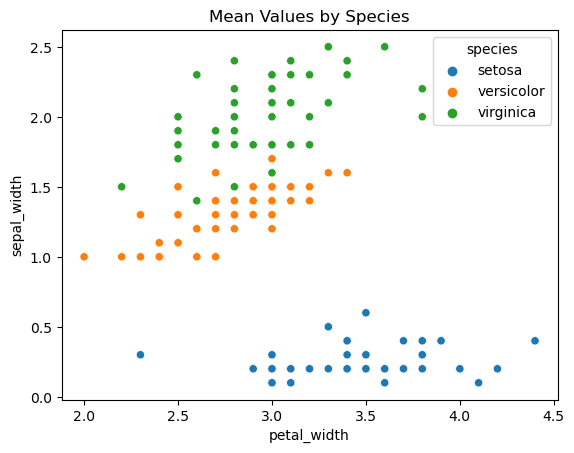

In [33]:
sns.scatterplot(data=df, x='sepal_width', y='petal_width', hue='species')

# Adding title and labels (optional)
plt.title('Mean Values by Species')
plt.xlabel('petal_width')
plt.ylabel('sepal_width')

# Show the plot
plt.show()

In [34]:
# Cluster Centers aka centroids. -- The output is also not scaled; 
    # it would be scaled if the data used to fit was scaled.

kmeans.cluster_centers_

array([[1.30943396, 2.70754717],
       [0.24489796, 3.45102041],
       [2.05208333, 3.04166667]])

In [35]:
# Make a dataframe 

centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns[:2])
centroids

,petal_width,sepal_width
0,1.309434,2.707547
1,0.244898,3.451020
2,2.052083,3.041667


In [36]:
# Labels (same as from predict) for each observation

kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [37]:
df['cluster'] = 'cluster_' + df.cluster.astype(str)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,cluster_1
2,4.9,3.0,1.4,0.2,setosa,cluster_1
3,4.7,3.2,1.3,0.2,setosa,cluster_1
4,4.6,3.1,1.5,0.2,setosa,cluster_1
5,5.0,3.6,1.4,0.2,setosa,cluster_1


<Figure size 1400x900 with 0 Axes>

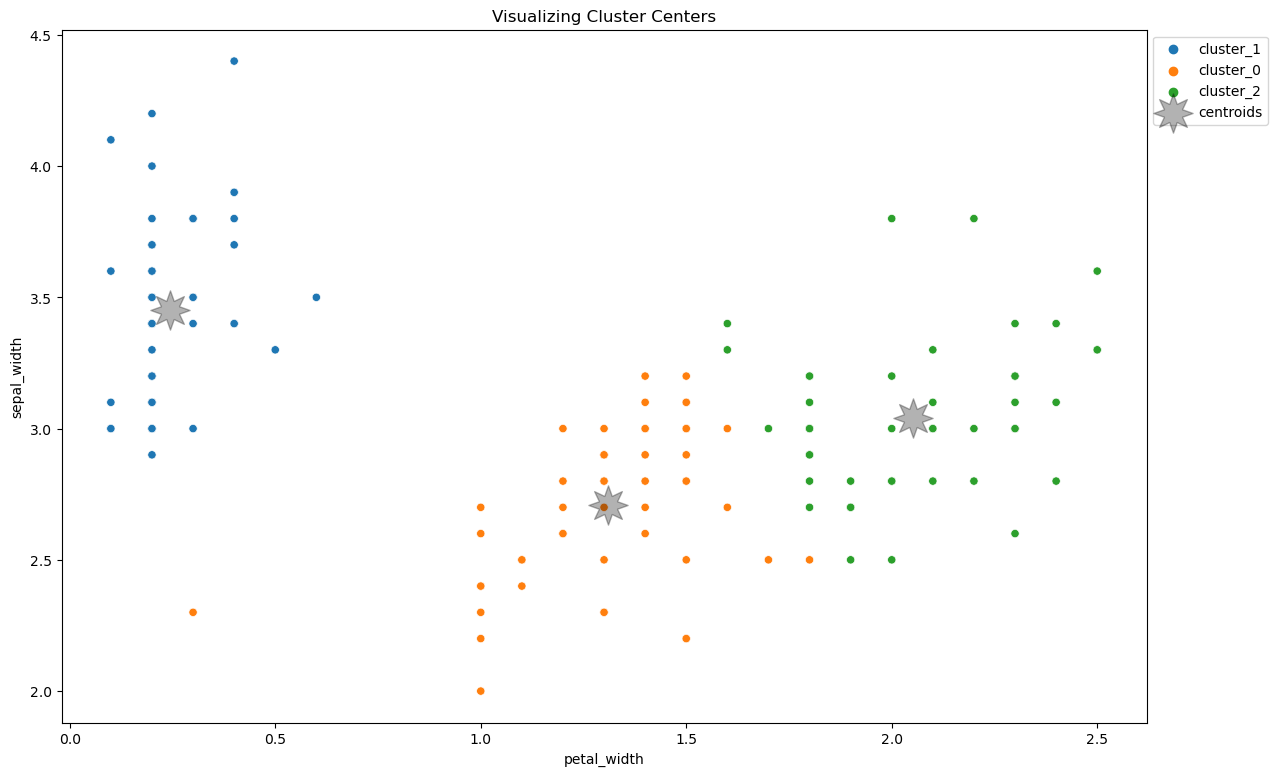

In [38]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))
plt.figure(figsize=(14, 9))


# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_width', y = 'sepal_width', data = df, hue = 'cluster')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'petal_width', y = 'sepal_width', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = (8,1,0), label = 'centroids')

plt.title('Visualizing Cluster Centers')

# Get unique cluster labels
unique_clusters = df['cluster'].unique()

# Create legend labels for clusters
cluster_labels = [f'Cluster {cluster}' for cluster in unique_clusters]

plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

## How to choose 'k'

### **A *priori* knowledge about application domain/educated guess**

- How many five different types of bacteria in the world (k = 5)
- There are two different kinds of people in world (k = 2)
### Search for a 'good' k value

-Try different k values and evaluate results
    - Inertia = Within Cluster Sum of Squared (WCSS) distances from each point to it's assigned centroid
                minimize inertia
    - Use elbow method (using inertia) to choose k

In [39]:
kmeans.inertia_

20.602395953664484

In [40]:
k = 2

kmeans = KMeans(n_clusters= k)
kmeans.fit(X)
kmeans.inertia_

88.98979166666669

In [41]:
k = 3

kmeans = KMeans(n_clusters= k)
kmeans.fit(X)
kmeans.inertia_

20.602395953664484

In [42]:
k = 4

kmeans = KMeans(n_clusters= k)
kmeans.fit(X)
kmeans.inertia_

16.701639739229023

In [43]:
k = 5

kmeans = KMeans(n_clusters= k)
kmeans.fit(X)
kmeans.inertia_

12.912435966810966

# Elbow Method:

1. Examine the resulting plot, looking for the "elbow" point, which is the value of k where the decrease in WCSS starts to level off significantly.
- The elbow point represents a trade-off between reducing the WCSS (increasing the number of clusters) and keeping the model simple.

- The elbow method provides a guideline to assist in selecting a suitable value for k, but it should be combined with domain knowledge and other evaluation metrics for a comprehensive analysis.

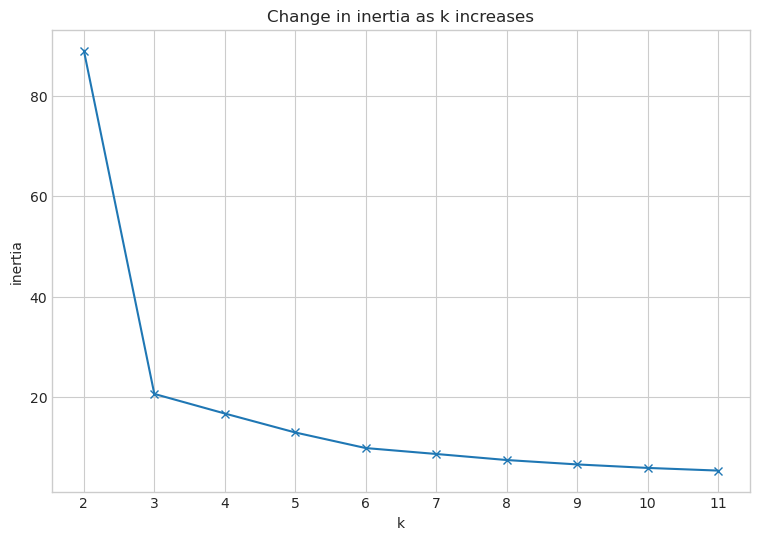

In [44]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

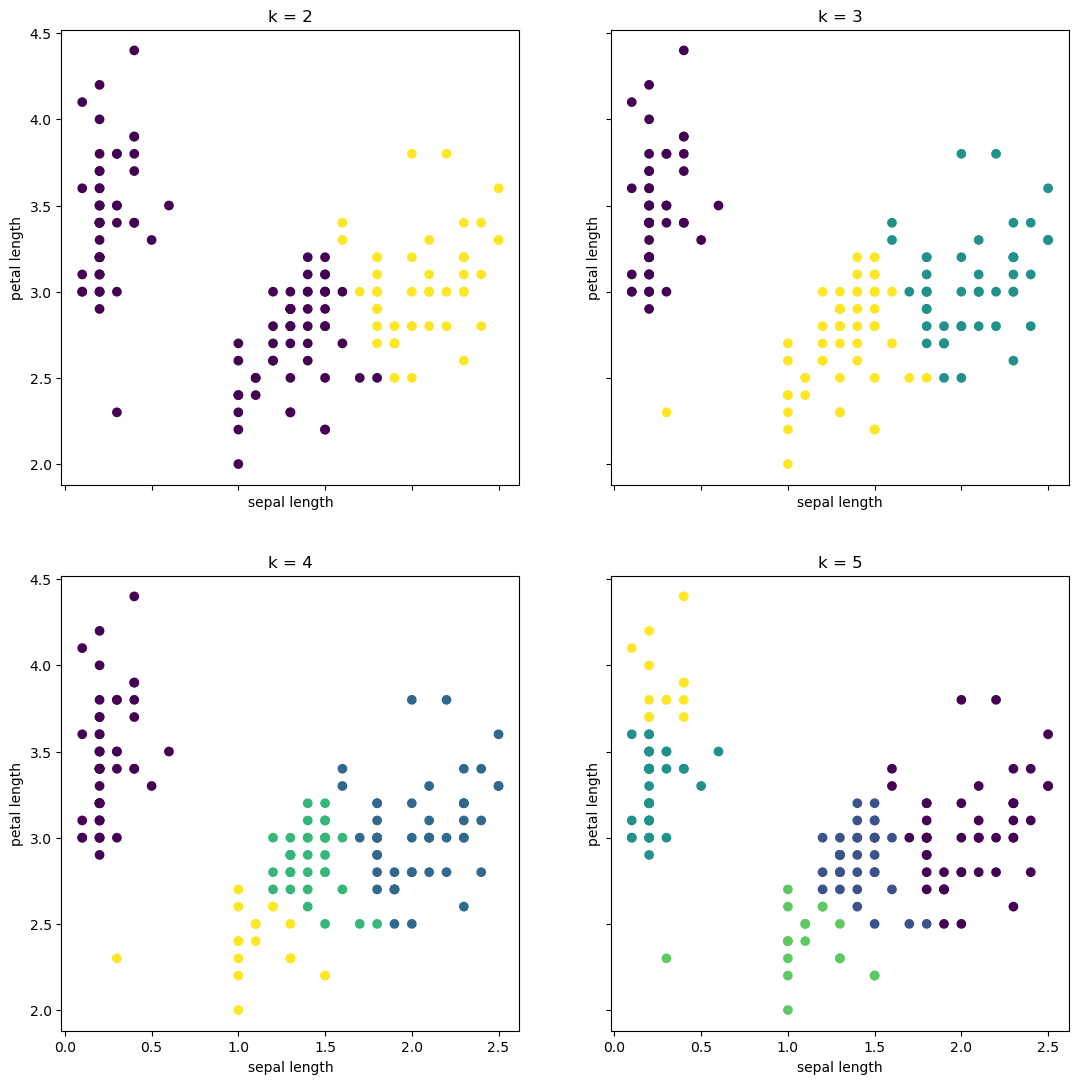

In [46]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    
    clusters = KMeans(k).fit(X).predict(X)
    
    ax.scatter(X.petal_width, X.sepal_width, c=clusters)
    
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='petal length')